<a href="https://colab.research.google.com/github/gfdiazc/dsprojects/blob/main/ATP_Tennis_Web_scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The goal of this project is to analyze the data of the ATP Tennis and learn more about web scraping and data analysis whit Phyton.

To do this, I'm going to do a little of Web Scraping using the Beautiful Soup and the Request library. One time that extract the data in the web page, then I'm going to analyze using Pandas, Matplotlib, Numpy and Seaborn libraries.

## Data Source:

Thanks to https://www.ultimatetennisstatistics.com, that is the webpage that I'm going to scraping for this project.

**Note: It's important to consider that this data maybe is not 100% actualize, but this is a more educational project. For the next time I'm going to use ATP Tour data.**

## Project Goals:

Understanding more about the professional player of the ATP Tour. Some question that we can solve to do that:

*   What is the distribution or average in weeks for a player that reach the number 1 of the ranking?

*   Which player has the most weeks as No. 1 in the ATP Rankings?

*   Who is the player who won the most Grand Slam?

*   What countries have more Olympic medals?

In [1]:
# Import the libraries
import requests
from bs4 import BeautifulSoup as bs
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Style of the plots
color_1 = '#002865'
color_2 = '#00AFF0' 

In [2]:
webpage = 'https://www.ultimatetennisstatistics.com/goatListTable?current=1&rowCount=-1&sort%5BtotalPoints%5D=desc&searchPhrase=&oldLegends=true&_=1620987911961'

source = requests.get(webpage)

# Convert to a beatiful soup object
soup = bs(source.content)

# Print out the html
content = soup.prettify()
#print(content) #It's ok

In [3]:
# Get the table data in json format
table = soup.find('p').text
#print(table) #It's ok

In [4]:
# Load json data into a data frame using pandas
df = pd.read_json(table)

new_df = pd.json_normalize(json.loads(df.to_json(orient="records")))
new_df.head(2)

,current,rowCount,total,rows.rank,rows.playerId,rows.name,rows.country.name,rows.country.id,rows.country.code,rows.active,rows.dob,rows.totalPoints,rows.tournamentPoints,rows.rankingPoints,rows.achievementsPoints,rows.tGPoints,rows.tFLPoints,rows.tMPoints,rows.tOPoints,rows.tABPoints,rows.tDTPoints,rows.yearEndRankPoints,rows.bestRankPoints,rows.weeksAtNo1Points,rows.weeksAtEloTopNPoints,rows.bestEloRatingPoints,rows.grandSlamPoints,rows.bigWinsPoints,rows.h2hPoints,rows.recordsPoints,rows.bestSeasonPoints,rows.greatestRivalriesPoints,rows.performancePoints,rows.statisticsPoints,rows.grandSlams,rows.tourFinals,rows.altFinals,rows.masters,rows.olympics,rows.bigTitles,rows.titles,rows.weeksAtNo1,rows.wonLost,rows.bestEloRating,rows.bestEloRatingDate,rows.wonPct
0,1,654,654,1,3819,Roger Federer,Switzerland,SUI,ch,True,1981-08-08,934,565,199,170,245,65,172,2,80,1,83,8,31,59,18,32,40,18,66,3,3,5,3,20,6,0,28,0,54,103,310,1237-273,2550,2007-03-05,81.9%
1,1,654,654,2,4920,Novak Djokovic,Serbia,SRB,rs,True,1987-05-22,901,500,200,201,215,44,195,1,40,5,75,8,32,49,36,30,44,26,71,9,8,11,2,18,5,0,36,0,59,82,322,950-194,2629,2016-02-01,83.0%


In [5]:
# Let's clean or dataframe
new_df.columns = new_df.columns.str.replace("rows", "")
new_df.columns = new_df.columns.str.replace("_", "")
new_df.columns = new_df.columns.str.replace("Points", "_Points")
new_df.columns = new_df.columns.str.replace(".", "")
new_df.drop(['current', 'rowCount', 'total', 'playerId'], axis=1, inplace=True)

new_df.head(2)

,rank,name,countryname,countryid,countrycode,active,dob,total_Points,tournament_Points,ranking_Points,achievements_Points,tG_Points,tFL_Points,tM_Points,tO_Points,tAB_Points,tDT_Points,yearEndRank_Points,bestRank_Points,weeksAtNo1_Points,weeksAtEloTopN_Points,bestEloRating_Points,grandSlam_Points,bigWins_Points,h2h_Points,records_Points,bestSeason_Points,greatestRivalries_Points,performance_Points,statistics_Points,grandSlams,tourFinals,altFinals,masters,olympics,bigTitles,titles,weeksAtNo1,wonLost,bestEloRating,bestEloRatingDate,wonPct
0,1,Roger Federer,Switzerland,SUI,ch,True,1981-08-08,934,565,199,170,245,65,172,2,80,1,83,8,31,59,18,32,40,18,66,3,3,5,3,20,6,0,28,0,54,103,310,1237-273,2550,2007-03-05,81.9%
1,2,Novak Djokovic,Serbia,SRB,rs,True,1987-05-22,901,500,200,201,215,44,195,1,40,5,75,8,32,49,36,30,44,26,71,9,8,11,2,18,5,0,36,0,59,82,322,950-194,2629,2016-02-01,83.0%


In [6]:
# Investigate the dtype
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rank                      654 non-null    int64 
 1   name                      654 non-null    object
 2   countryname               654 non-null    object
 3   countryid                 654 non-null    object
 4   countrycode               654 non-null    object
 5   active                    654 non-null    bool  
 6   dob                       654 non-null    object
 7   total_Points              654 non-null    int64 
 8   tournament_Points         654 non-null    int64 
 9   ranking_Points            654 non-null    int64 
 10  achievements_Points       654 non-null    int64 
 11  tG_Points                 654 non-null    int64 
 12  tFL_Points                654 non-null    int64 
 13  tM_Points                 654 non-null    int64 
 14  tO_Points                 

In [7]:
# Separate the column "wonLost"
# new data frame with split value columns
wonlost = new_df["wonLost"].str.split("-", n = 1, expand = True)
#wonlost.head(2)
  
# making separate first name column from new data frame
new_df["Won"]= wonlost[0]
  
# making separate last name column from new data frame
new_df["Lost"]= wonlost[1]
  
# Dropping old Name columns
new_df.drop(columns =["wonLost"], inplace = True)

# Parse the bestEloRatingDate into date
new_df['bestEloRatingDate']= pd.to_datetime(new_df['bestEloRatingDate'])
new_df['Won'] = pd.to_numeric(new_df['Won'])
new_df['Lost'] = pd.to_numeric(new_df['Lost'])

# Parse to percentaje the wonPct
# Remove the "%" of the data
new_df['wonPct'] = new_df['wonPct'].str.replace("%", "")

new_df['wonPct'] = pd.to_numeric(new_df['wonPct'])

# Investigate the dtype
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rank                      654 non-null    int64         
 1   name                      654 non-null    object        
 2   countryname               654 non-null    object        
 3   countryid                 654 non-null    object        
 4   countrycode               654 non-null    object        
 5   active                    654 non-null    bool          
 6   dob                       654 non-null    object        
 7   total_Points              654 non-null    int64         
 8   tournament_Points         654 non-null    int64         
 9   ranking_Points            654 non-null    int64         
 10  achievements_Points       654 non-null    int64         
 11  tG_Points                 654 non-null    int64         
 12  tFL_Points            

## What is the distribution or average in weeks for a player that reach the number 1 of the ranking ATP?

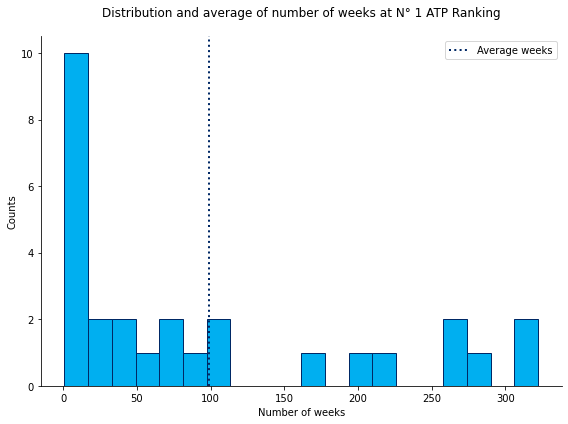

In [8]:
# Filter the data to select only the columns that weeks in N° are more than 0
weeks_number_one = new_df[new_df["weeksAtNo1"] > 0]

# Calculate the average
average = np.mean(weeks_number_one["weeksAtNo1"])

# Create the figure
fig, ax = plt.subplots(figsize=(8,6))

# Style of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the histogram
plt.hist(weeks_number_one["weeksAtNo1"], bins=20, edgecolor=color_1, color=color_2)
plt.axvline(average, color=color_1, label="Average weeks", linewidth=2, ls=":")

# Post the title and labels
plt.title("Distribution and average of number of weeks at N° 1 ATP Ranking", pad=20)
plt.xlabel("Number of weeks")
plt.ylabel("Counts")

plt.tight_layout()
plt.legend()
plt.show()

We can see that it's pretty hard to beat more than 50 weeks in the number one of the ranking and become harder when we talk about more than 100 weeks. The interesting thing is like when you can pass this barrier, you can reach a pretty good streak. For example, we can see that the other values are between in the range of 150 and 300 weeks!

The average weeks in the number one of the ATP Ranking is 98,6 weeks.

## Which players has the most weeks as No. 1 in the ATP Rankings?




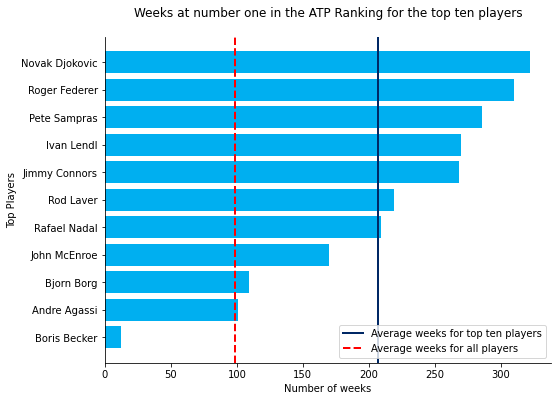

In [9]:
# Create a new df that groups the 10 best players who reached the N ° 1 ATP Rankings
top_players = weeks_number_one[['name', 'weeksAtNo1']][:11].sort_values(by=['weeksAtNo1']).reset_index(drop=True)

# Calculate the average of the top players
top_players_average = np.mean(top_players['weeksAtNo1'])

# Let's create a bar plot
# Create the figure
fig, ax = plt.subplots(figsize=(8,6))

# Style of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the barplot
plt.barh(top_players['name'], top_players['weeksAtNo1'], data=top_players, color=color_2)
plt.axvline(top_players_average, color=color_1, label="Average weeks for top ten players", linewidth=2)
plt.axvline(average, color='red', label="Average weeks for all players", linewidth=2, ls="--")

# Post the title and labels
plt.title("Weeks at number one in the ATP Ranking for the top ten players", pad=20)

plt.xlabel("Number of weeks")
plt.ylabel("Top Players")

plt.legend()
plt.show()

What happens if we do the same process but only for the active player?

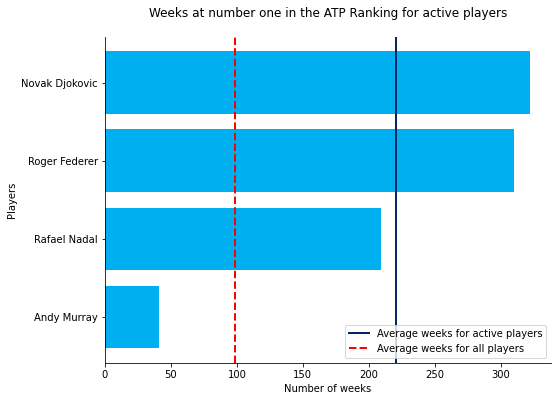

In [10]:
# Create a new df with only the active players
active_players = weeks_number_one[weeks_number_one.active == True]

# Create a new df that groups the 10 best players who reached the N ° 1 ATP Rankings
active_top_players = active_players[['name', 'weeksAtNo1']].sort_values(by=['weeksAtNo1']).reset_index(drop=True)

# Calculate the average of the top players
active_top_players_average = np.mean(active_top_players['weeksAtNo1'])

# Let's create a bar plot
# Create the figure
fig, ax = plt.subplots(figsize=(8,6))

# Style of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the barplot
plt.barh(active_top_players['name'], active_top_players['weeksAtNo1'], data=top_players, color=color_2)
plt.axvline(active_top_players_average, color=color_1, label="Average weeks for active players", linewidth=2)
plt.axvline(average, color='red', label="Average weeks for all players", linewidth=2, ls="--")

# Post the title and labels
plt.title("Weeks at number one in the ATP Ranking for active players", pad=20)

plt.xlabel("Number of weeks")
plt.ylabel("Players")

plt.legend()
plt.show()

As we can see in these graphs, Novak, Federer, Sampras are the players with the most weeks at No. 1 in the ATP Rankings.
If we only consider active players, Novak, Federer and Nadal, where those with more weeks at No. 1. Also, if we compare the average weeks in tennis number one for the top ten vs all players, we see they have a difference of 100 weeks more approximately.

# Who is the player who won the most Grand Slam?

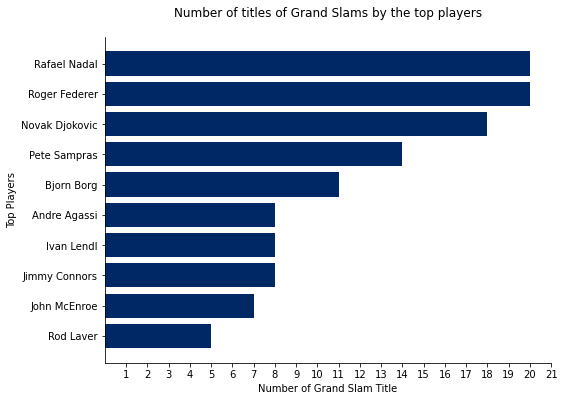

In [11]:
# Create a new DF with only the players who won a Grand Slam title
grand_slam = new_df[new_df["grandSlams"] > 0][:10].sort_values(by='grandSlams', ascending=True)


# Let's create a bar plot
# Create the figure
fig, ax = plt.subplots(figsize=(8,6))

# Style of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(1,25,1))

# Make the barplot
plt.barh(grand_slam['name'], grand_slam['grandSlams'], data=grand_slam, color=color_1)


# Post the title and labels
plt.title("Number of titles of Grand Slams by the top players", pad=20)

plt.xlabel("Number of Grand Slam Title")
plt.ylabel("Top Players")

plt.show()

**Let's go Roger, Let's Go**

# Which countries have the most number one players?



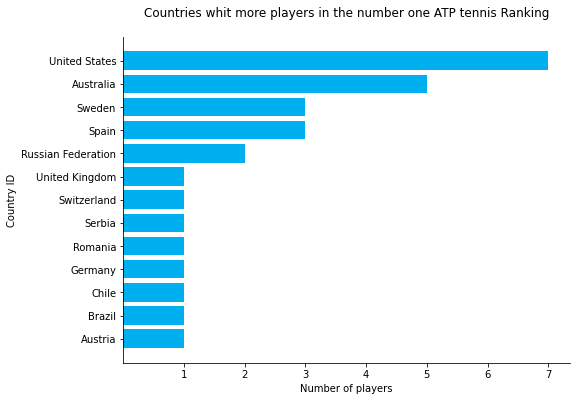

In [12]:
# We can create a new column using lambda that is one if Week on number one is more than 0
new_df["Number_one"] = new_df["weeksAtNo1"].apply(lambda x: 1 if x > 0 else 0)

# Now we can create a pivot table with the sum of how many players reached number one per country.
countries_top = new_df.groupby('countryname')['Number_one'].sum().reset_index(name='sum')
# Let's printed 
#countries_top # It's Ok

countries_top = countries_top[countries_top['sum']>0]
countries_top = countries_top.sort_values(by='sum', ascending=True)

# We can create a bar plot of country and this new column
# Create the figure
fig, ax = plt.subplots(figsize=(8,6))

# Style of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(1,10,1))

# Make the barplot
plt.barh(countries_top['countryname'], countries_top['sum'], data=countries_top, color=color_2)

# Post the title and labels
plt.title("Countries whit more players in the number one ATP tennis Ranking", pad=20)

plt.xlabel("Number of players")
plt.ylabel("Country ID")


plt.show()

The United States, Australia, Sweden and Spain are the countries with the most players who have reached number one in tennis.

There are 2 Latin American countries (Brazil and Chile) on this list.
Brazil: guga kuerten.
Chile: Marcelo Ríos.
👏👏🎉